# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/bbhatt001/human-microbiome-project

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hmp_df = pd.read_csv("project_catalog (1).csv")


# Did creating the dataframe work?
print(hmp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HMP ID                   2915 non-null   int64 
 1   GOLD ID                  1783 non-null   object
 2   Organism Name            2915 non-null   object
 3   Domain                   2712 non-null   object
 4   NCBI Superkingdom        2751 non-null   object
 5   HMP Isolation Body Site  2915 non-null   object
 6   Project Status           2915 non-null   object
 7   Current Finishing Level  1579 non-null   object
 8   NCBI Submission Status   2915 non-null   object
 9   NCBI Project ID          2915 non-null   int64 
 10  Genbank ID               1579 non-null   object
 11  Gene Count               2915 non-null   int64 
 12  IMG/HMP ID               2915 non-null   int64 
 13  HOMD ID                  397 non-null    object
 14  Sequencing Center        2911 non-null  

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [16]:
# show the first two rows
hmp_df.head(2)

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"


In [15]:
# check how many rows and columns are present
hmp_df.shape

(2915, 17)

In [14]:
# get column names
hmp_df.columns

Index(['HMP ID', 'GOLD ID', 'Organism Name', 'Domain', 'NCBI Superkingdom',
       'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
       'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count',
       'IMG/HMP ID', 'HOMD ID', 'Sequencing Center', 'Funding Source',
       'Strain Repository ID'],
      dtype='object')

In [17]:
# get a look at null counts
hmp_df.isnull().sum()

HMP ID                        0
GOLD ID                    1132
Organism Name                 0
Domain                      203
NCBI Superkingdom           164
HMP Isolation Body Site       0
Project Status                0
Current Finishing Level    1336
NCBI Submission Status        0
NCBI Project ID               0
Genbank ID                 1336
Gene Count                    0
IMG/HMP ID                    0
HOMD ID                    2518
Sequencing Center             4
Funding Source                0
Strain Repository ID       1538
dtype: int64

In [23]:
# what unique organisms are present?
hmp_df['Organism Name'].value_counts()

Aeromonas veronii AMC34                   3
Plesiomonas sp. HPP0020                   2
Facklamia languida CCUG 37842             2
Clostridium ramosum DSM 1402              2
Haemophilus parainfluenzae ATCC 33392     2
                                         ..
Propionibacterium acnes HL036PA2          1
Lactobacillus oris PB013-T2-3             1
Enterococcus faecalis 599                 1
Lachnospiraceae bacterium ORNL_W42_D12    1
Clostridium clostridioforme CM201         1
Name: Organism Name, Length: 2906, dtype: int64

In [19]:
# what domains are represented?
hmp_df['Domain'].value_counts()

BACTERIAL    2696
EUKARYAL        8
VIRUS           6
ARCHAEAL        2
Name: Domain, dtype: int64

In [22]:
# superkingdoms?
hmp_df['NCBI Superkingdom'].value_counts()

Bacteria     2732
Eukaryota       8
Viruses         6
Error!!!        3
Archaea         2
Name: NCBI Superkingdom, dtype: int64

In [21]:
# collection sites
hmp_df['HMP Isolation Body Site'].value_counts()

gastrointestinal_tract    745
unknown                   654
urogenital_tract          529
oral                      347
skin                      267
airways                   236
blood                      75
bone                       27
other                      13
eye                         8
ear                         4
wound                       4
nose                        2
heart                       2
liver                       1
lymph_nodes                 1
Name: HMP Isolation Body Site, dtype: int64

In [25]:
# peek at the gene count stats
hmp_df['Gene Count'].describe()

count    2915.000000
mean     1474.622642
std      1653.762393
min         0.000000
25%         0.000000
50%      1517.000000
75%      2489.500000
max      8490.000000
Name: Gene Count, dtype: float64

In [28]:
# how many zero values are present in Gene Counts
(hmp_df['Gene Count'] == 0).value_counts()

False    1523
True     1392
Name: Gene Count, dtype: int64

In [29]:
# not much to correlate out of the box
hmp_df.corr()

,HMP ID,NCBI Project ID,Gene Count,IMG/HMP ID
HMP ID,1.000000,-0.203208,0.161011,0.121604
NCBI Project ID,-0.203208,1.000000,-0.606112,-0.429478
Gene Count,0.161011,-0.606112,1.000000,0.334027
IMG/HMP ID,0.121604,-0.429478,0.334027,1.000000


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

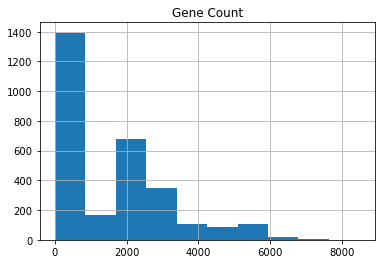

In [76]:
hmp_df.hist('Gene Count')
plt.show()

# show the distribution of Gene Count values

<AxesSubplot:xlabel='Gene Count', ylabel='HMP Isolation Body Site'>

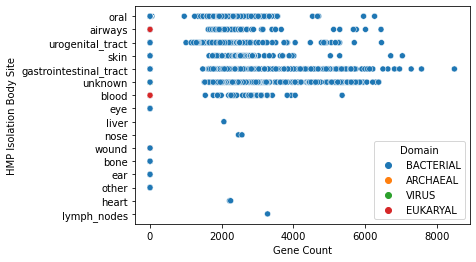

In [82]:
sns.scatterplot(data= hmp_df, x='Gene Count', y='HMP Isolation Body Site', hue='Domain')

# SHow the distribution of Gene counts by collection site and domain type

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

This dataset conatins several columns with numerical data types, however only one will prove to be useful for my business issue: Gene Count. The other numerical columns refer to study IDs and wont have much bearing on my analysis.

The above observation is a bit concerning for the purposes of finding correlations between variables later on. 

This EDA process has brought to light a few cleaning tasks, such as removing the rows with a count of zero genes.